<a href="https://colab.research.google.com/github/risen9/scaler-projects/blob/main/Netflix_Data_Exploration_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Netflix Data Exploration Business Case


# Introduction

Netflix is one of the most popular streaming services out there, and their library of almost 10,000 titles, both movies and TV shows make them one of the most biggest as well. We will be taking a look at this dataset which contains information about all of the titles on Netflix as a platform and gaining insights on how Netflix operates.

I will also be giving some recommendations based on those insights on how Netflix can continue being a profitable business.

Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud


Loading data

In [ ]:
nf_data = pd.read_csv('netflix.csv')
nf_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Statistical info of raw data

In [ ]:
nf_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


General data type information of the dataframe

In [ ]:
nf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Basic Analysis


Converting string to datetime

In [ ]:
nf_data["date_added"] = pd.to_datetime(nf_data['date_added'])

1. Handling Null values

Counting how many values are missing.

In [ ]:
for col in list(nf_data.columns):
    print(col, nf_data[col].isnull().sum())

show_id 0
type 0
title 0
director 2634
cast 825
country 831
date_added 10
release_year 0
rating 4
duration 3
listed_in 0
description 0


In [ ]:
print(nf_data['rating'].unique())



['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']


It seems that some of the rows under rating column has been incorrectly filled with data from the duration column.

So we will have to figure out where this has happened.

In [ ]:

nf_data.loc[nf_data['rating'] == '84 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [ ]:
nf_data.loc[nf_data['rating'] == '74 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [ ]:
nf_data.loc[nf_data['rating'] == '66 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


Findings show that rating and duration have been swtiched around so we will copy the value in rating to duration and then set the rating for those affected rows to NaN.

The rows to change are 5541, 5794, 5813.

We will be first copying the data from rating to duration and then setting rating to NaN.

In [ ]:

nf_data.loc[nf_data['duration'].isna(), 'duration'] = nf_data.loc[nf_data['duration'].isna(), 'rating']

nf_data.loc[[5541,5794,5813], 'rating'] = np.nan

nf_data.loc[[5541,5794,5813], ['rating','duration']]

,rating,duration
5541,NaN,74 min
5794,NaN,84 min
5813,NaN,66 min


In [ ]:
print(nf_data['rating'].unique())

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' nan 'NR' 'TV-Y7-FV' 'UR']


Removing the rest of the NaN data requires that we use Imputation methods

In our case study, most of the missing values are director and country names,
so we will simply be using fillna, and dropping the rest of the data with NaN values

In [ ]:
nf_data.director.fillna("Unknown Director", inplace = True)
nf_data.country.fillna("Unknown Country", inplace = True)
nf_data.cast.fillna("Unknown Actor", inplace = True)
nf_data.dropna(subset=['rating'],inplace= True)

In [ ]:
nf_data.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [ ]:
nf_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


We have now filled all NaN with workable data, and removed all the rows that would not affect data integrity too much

2. Unnesting data

To keep the original dataset unchanged while exploding, it is copied to nf_cast and nf_country

In [ ]:
nf_country = nf_data.copy()
nf_country["country"] = nf_country["country"].apply(lambda x: str(x).split(', '))
nf_country = nf_country.explode("country")




nf_country.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
nf_cast = nf_data.copy()

nf_cast["cast"] = nf_cast["cast"].apply(lambda x: str(x).split(', '))
nf_cast = nf_cast.explode("cast")



nf_cast.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


# 1.Find the counts of each categorical variable both using graphical and non-graphical analysis.

Statistical summary

In [ ]:
nf_data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


We will now be looking at how many titles are on Netflix by category (TV Shows or Movies)

a. Non graphical analysis

In [ ]:
nf_type = nf_data['type'].value_counts()
nf_type

Movie      6126
TV Show    2664
Name: type, dtype: int64

To show visualisations with cast and country, we will be using nf_cast and nf_country from now


b. Graphical analysis

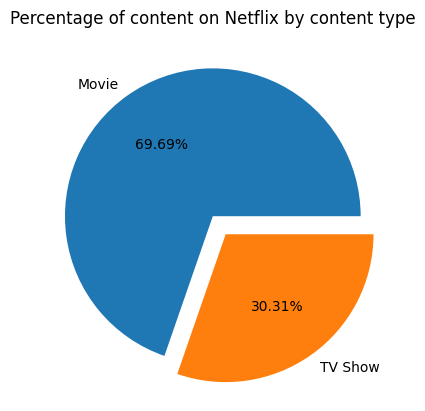

In [ ]:
nf_type = nf_data['type'].value_counts()
plt.pie(nf_type, labels = ['Movie','TV Show'], autopct = "%.2f%%", explode=[0, 0.15])

plt.title('Percentage of content on Netflix by content type')
plt.show()

Almost 70% of Netflix's content library are movies, with the rest 30% being TV Shows

We will also take a look at how Netflix has added content over the years

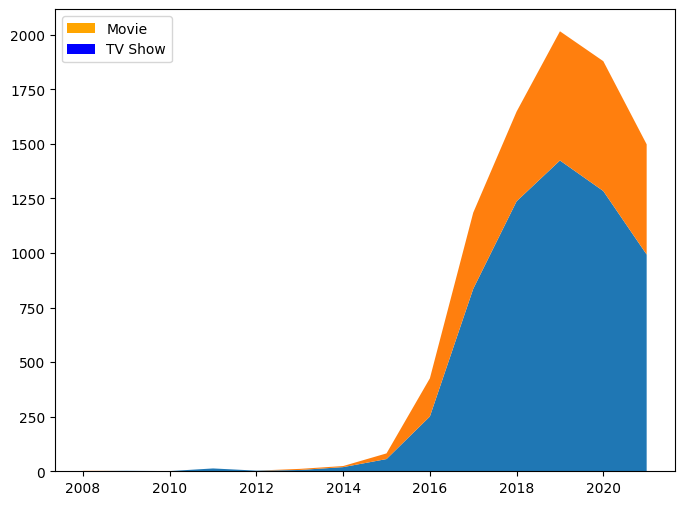

In [ ]:
from matplotlib.patches import Rectangle
nf_trend = nf_data.copy()

nf_trend['netflix_year'] = nf_trend['date_added'].dt.year

nf_trend.drop(['show_id', 'title', 'director',	'cast',	'country','date_added','rating','duration', 'listed_in', 'description'], axis = 1, inplace = True)
nf_trend.head()
year_grpby = nf_trend.groupby('netflix_year').type.value_counts()
year_grpby = year_grpby.unstack().fillna(0)

year_grpby.head(10)

fig, ax = plt.subplots(1, 1, figsize = (8, 6))

ax.stackplot(year_grpby.index, year_grpby['Movie'], year_grpby['TV Show'])
p1 = Rectangle((0, 0), 1, 1, fc="orange")
p2 = Rectangle((0, 0), 1, 1, fc="blue")
plt.legend([p1, p2], ['Movie', 'TV Show'], loc='upper left')


Post 2016 Netflix saw a ton of content added, which is consistent with the streaming boom that we saw during that time.

# 2.Comparison of tv shows vs. movies.

Filtering to only movies and only tv show dataframes

In [ ]:
nf_movie = nf_country.loc[nf_data["type"] == 'Movie']
nf_movie.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown Country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [ ]:
nf_tv = nf_country.loc[nf_data["type"] == 'TV Show']
nf_tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


 a. Top 10 countries by number of movies made

In [ ]:
ten_country_m = nf_movie.copy()


ten_country_m["country"] = ten_country_m["country"].apply(lambda x: str(x).split(', '))
ten_country_m = ten_country_m.explode("country")
ten_country_m.head()


final_ten_country_m = ten_country_m['country'].value_counts().rename_axis('country').reset_index(name ='movies').head(11)
final_ten_country_m.drop(index = 0, axis = 0,inplace=True) # removes the unknown country row
final_ten_country_m.head(10)

,country,movies
1,India,962
2,United Kingdom,532
3,Unknown Country,439
4,Canada,319
5,France,303
6,Germany,182
7,Spain,171
8,Japan,119
9,China,114
10,Mexico,111


<Axes: xlabel='movies', ylabel='country'>

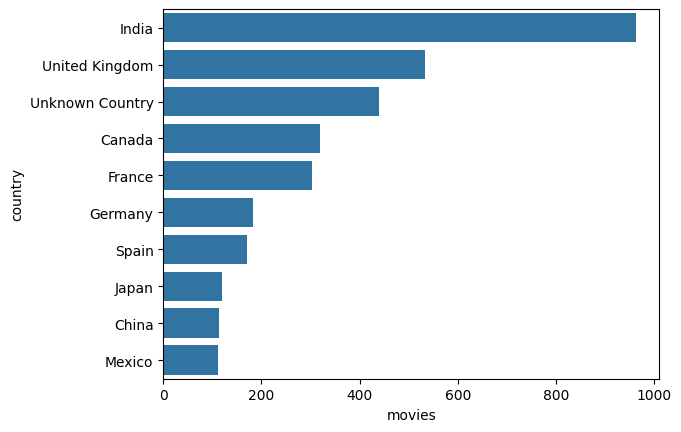

In [ ]:
sns.barplot(x='movies', y='country', data = final_ten_country_m)

b. Top 10 countries by number of TV shows made

In [ ]:
ten_country_tv = nf_tv.copy()


ten_country_tv["country"] = ten_country_tv["country"].apply(lambda x: str(x).split(', '))
ten_country_tv = ten_country_tv.explode("country")
ten_country_tv.head()


final_ten_country_tv = ten_country_tv['country'].value_counts().rename_axis('country').reset_index(name ='TV shows').head(11)
final_ten_country_tv.drop(index = 1, axis = 0,inplace=True) # removes the unknown country row
final_ten_country_tv.head(10)

,country,TV shows
0,United States,932
2,United Kingdom,271
3,Japan,197
4,South Korea,170
5,Canada,126
6,France,90
7,India,84
8,Taiwan,70
9,Australia,64
10,Spain,61


<Axes: xlabel='TV shows', ylabel='country'>

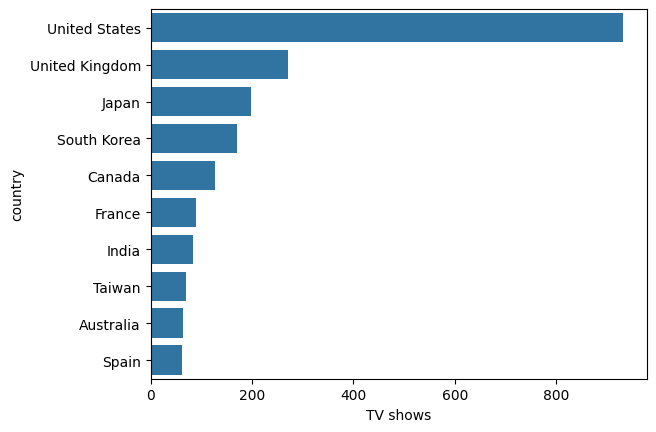

In [ ]:
sns.barplot(x='TV shows', y='country', data = final_ten_country_tv)

# 3. What is the best time to launch a TV Show

a. Here is the best week to launch content on Netflix

In [ ]:
nf_tv['date_added'] = nf_tv['date_added'] - pd.to_timedelta(7, unit='d')
best_tv = nf_tv.groupby([pd.Grouper(key='date_added', freq='W')])['title'].count()
best_tv.sort_values(ascending=False).head(10)


#nf_tv.groupby(nf_data.date_added.dt.month)['title'].count()

date_added
2021-07-04    50
2015-12-27    48
2021-06-13    45
2021-04-11    36
2019-12-29    35
2019-09-29    31
2019-10-27    29
2017-06-25    29
2017-07-30    28
2020-10-25    27
Name: title, dtype: int64

2021-07-04 was the best time to launch a TV show on Netflix

Here is the best week to launch a movie

In [ ]:
nf_movie['date_added'] = nf_movie['date_added'] - pd.to_timedelta(7, unit='d')
best_movie= nf_movie.groupby([pd.Grouper(key='date_added', freq='W')])['title'].count()

best_movie.sort_values(ascending=False).head(10)

date_added
2019-12-29    221
2019-10-27    117
2021-06-27    101
2018-09-30    100
2018-02-25     94
2021-08-29     91
2018-12-30     82
2018-10-28     80
2019-09-29     76
2018-07-29     73
Name: title, dtype: int64

2019-12-15 was the best time to launch a movie on Netflix

b. Here is the best month to launch content on Netflix

Figuring out what the best month is to launch a TV show


In [ ]:
best_m_tv = nf_tv.groupby(nf_tv.date_added.dt.month_name())['title'].count()

best_m_tv.sort_values(ascending=False).head(10)

date_added
December     336
June         317
September    287
August       260
March        259
July         253
November     238
April        236
May          233
January      225
Name: title, dtype: int64

November was the best month to launch a TV show

In [ ]:
best_m_movie = nf_movie.groupby(nf_movie.date_added.dt.month_name())['title'].count()

best_m_movie.sort_values(ascending=False).head(10)

date_added
December     867
October      711
September    708
June         696
July         673
August       671
March        665
April        655
February     596
May          556
Name: title, dtype: int64

December was the best time to launch a movie

# 4. Analysis of actors/directors of different types of shows/movies.

Creating a new dataframe for directors and cast so that original datafram is not affected.

A new cast dataframe was already created with the cast exploded, so we will be doing the same for director

In [ ]:
nf_director = nf_data.copy()

nf_director["director"] = nf_director["director"].apply(lambda x: str(x).split(', '))
nf_director = nf_director.explode("director")



nf_director.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


a. Here are the top 10 directors who have produced the most content for the platform

In [ ]:
ten_directors = nf_director['director'].value_counts().rename_axis('director').reset_index(name ='movies').head(11)
ten_directors.drop(index = 0, axis = 0,inplace=True) # removes the unknown directors row
ten_directors.head(10)

,director,movies
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Martin Scorsese,12
9,Youssef Chahine,12
10,Jay Chapman,12


<Axes: xlabel='movies', ylabel='director'>

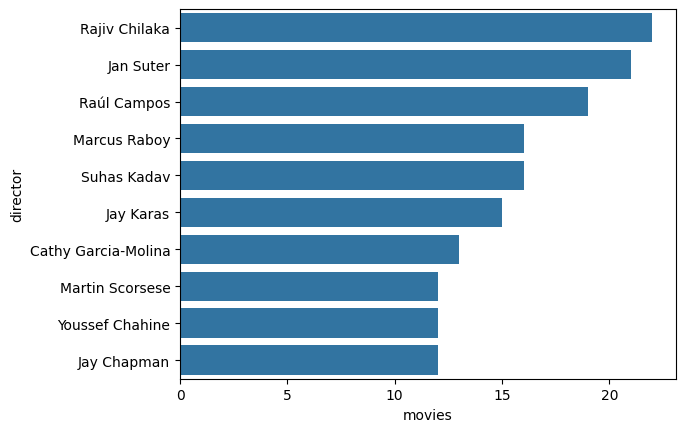

In [ ]:

sns.barplot(x='movies', y='director', data = ten_directors)


b. Here are the top 10 cast members who have appeared in the most titles on Netflix

In [ ]:
ten_cast = nf_cast['cast'].value_counts().rename_axis('cast').reset_index(name ='movies').head(11)
ten_cast.drop(index = 0, axis = 0,inplace=True) # removes the unknown cast row
ten_cast.head(10)

,cast,movies
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Takahiro Sakurai,32
5,Naseeruddin Shah,32
6,Rupa Bhimani,31
7,Om Puri,30
8,Akshay Kumar,30
9,Yuki Kaji,29
10,Paresh Rawal,28


<Axes: xlabel='movies', ylabel='cast'>

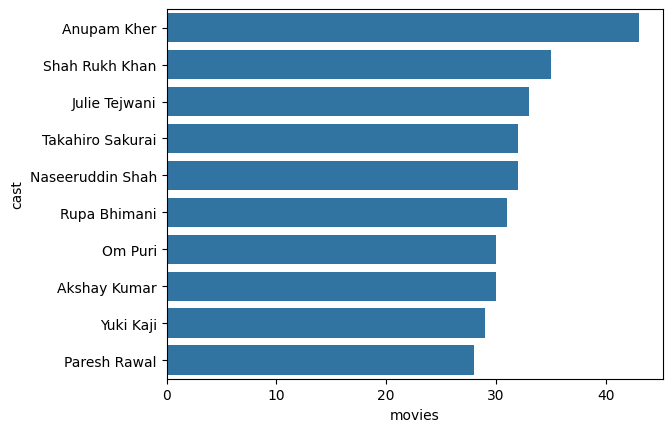

In [ ]:
sns.barplot(x='movies', y='cast', data = ten_cast)

# 5. Which genre movies are more popular or produced more

Exploding and unnesting genre data

In [ ]:
nf_genre = nf_data.copy()

nf_genre["listed_in"] = nf_genre["listed_in"].apply(lambda x: str(x).split(', '))
nf_genre = nf_genre.explode("listed_in")


nf_genre.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


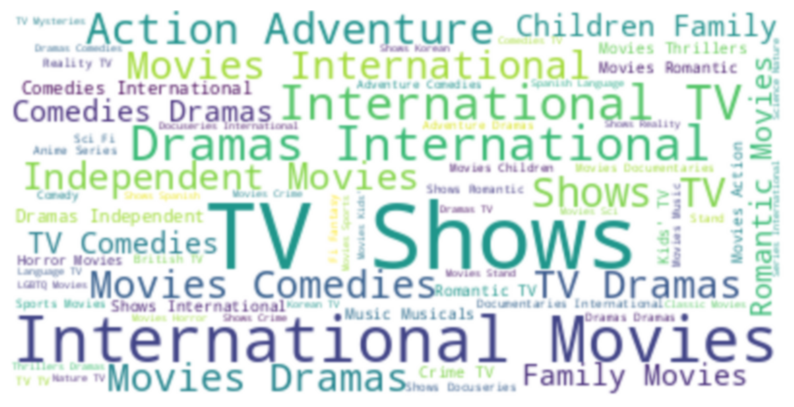

In [ ]:
gen = " ".join(str(a) for a in nf_genre.listed_in)
wc = WordCloud(background_color = "white").generate(gen)

plt.figure(figsize=(10,9))
plt.imshow(wc, interpolation='bicubic')
plt.axis("off")
plt.show()

The most popular genre on Netflix are mainly Dramas, Action adventure titles and Comedies

#6. Duration of Movies and TV shows

Text(0, 0.5, 'Duration in minutes')

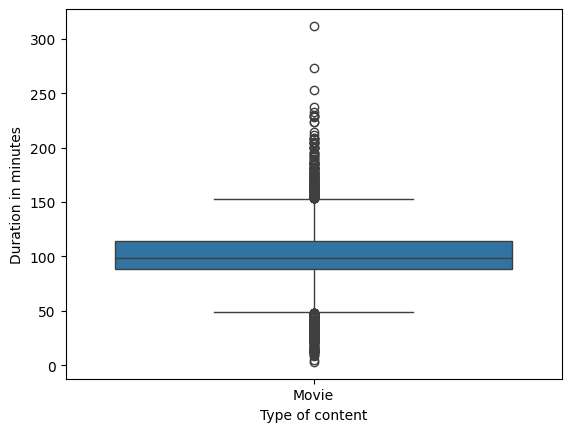

In [ ]:

sns.boxplot(data = nf_movie, x='type', y='duration')
plt.xlabel('Type of content')
plt.ylabel('Duration in minutes')

Text(0, 0.5, 'Duration in Seasons')

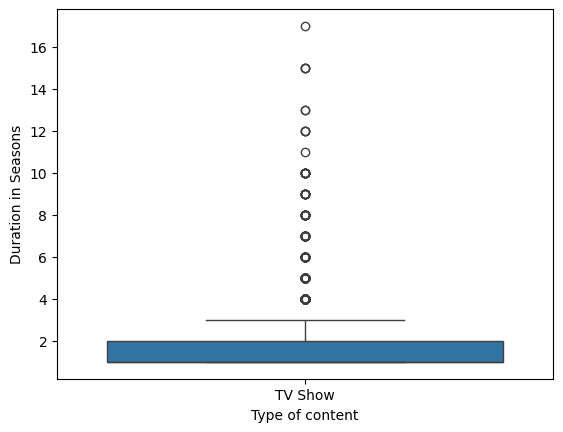

In [ ]:

sns.boxplot(data = nf_tv, x='type', y='duration')
plt.xlabel('Type of content')
plt.ylabel('Duration in Seasons')

# 7.Find After how many days the movie will be added to Netflix after the release of the movie

In [ ]:
nf_year = nf_data.copy()


nf_year['diff_year'] = nf_year['date_added'].dt.year - nf_year['release_year']
nf_year.mode()['diff_year'][0]



0.0

The mode of the year difference is zero, which means that the best time to launch any content on Netflix is the same year that that content released on other platforms or the cinemas.


#8. Missing Value & Outlier check

## Movies
From the boxplot on section 6, we see that most of the outliers are in the movies category.

There are a lot of movies below 50 minutes, which are most likely the documentaries in the catalog.

The longer movies above 150 minutes could be older movies or the odd modern movie that could be longer than the standard length.

##TV shows

The boxplot for TV series doesn't have too many outliers.

Netflix themselves have not produced a lot of shows that are more than 5 seasons because they haven't produced shows for that long, so you can assume that the shows with longer seasons are licensed content from other networks.


# Business Insights



Assuming this dataset is international, Netflix has done well to have a catalog of content that covers a diverse range of cast, directors, genres and languages.



* Duration of content: Most of Netflix’s movie content is around 90-100 minutes, while their shows usually run for 1-2 seasons. This shows that Netflix isn’t interested in renewing shows for more than 2 seasons and viewers prefer shorter shows. Movies have generally tended to 90-100 minutes everywhere in recent years, so Netflix cannot do anything about it.
* Genres: The most popular genres on Netflix are Dramas, Action adventure titles and Comedies. These are generally the most popular genres for media content in general, and that is reflected in Netflix’s catalog.
* The best week for TV shows on Netflix was 2021-07-04, while the best month was December closely followed by June.
* The best week for movies on Netflix was 2019-12-29, while the best month was December closely followed by October
* This trend shows that Netflix chooses the holiday season (December) the most often to launch new content on the platform.
* Doing so helps Netflix get new subscribers as people enjoy their holidays at home while streaming content through services like Netflix.
* New content was also added more often after 2017, when streaming really kicked off, but saw a small decline after 2020 when the world went into lockdown during the pandemic, and content production came to a standstill.



# Recommendations

##Genre diversity
Netflix currently focuses on dramas, action and comedies, and while those are generally the more popular genres, their catalog of  horror, thrillers, and science fiction titles need to be expanded.

##Regional Content

Netflix does have regional content, but those are focused in certain regions, mostly in English speaking countries, and India. They do have the means to produce content native to the regions that do not have much representation in their catalog. This can bring new subscribers from those regions, and also expose the media from those regions to an international audience.

##Movies and TV Show titles disparity

TV shows are vastly outnumbered by movies on Netflix, but there can potentially be an larger audience of people who could sign up to Netflix for TV shows and not just for movies.

More TV shows to balance out the number of movies could be something Netflix could take a look at.

##TV Show length

Most TV shows are limited by budget, and a lot of them don’t see the viewership they need to to survive. This is evidenced by my research into the data where we saw that the majority of shows on Netflix never had more than 2 seasons.

This could have happened due to a variety of reasons, like people not wanting to watch long shows, or those titles simply could be completely new shows that just started out. Netflix should look into the more popular shows that don’t have a lot of seasons and see if they can put money into reviving those shows.
